In [28]:
import pandas as pd
from opytex import texenv
%matplotlib inline

# Informations sur le devoir

In [29]:
ds_name = "DS_15_09_25"
classe = "313"

latex_info = {}
latex_info['titre'] = "DS 1" 
latex_info['classe'] = classe
latex_info['date'] = "25 septembre 2015"
latex_info

{'classe': '313', 'date': '25 septembre 2015', 'titre': 'DS 1'}

# Import et premiers traitements

In [30]:
notes = pd.ExcelFile("./../../../"+classe+".xlsx")
notes.sheet_names
notes = notes.parse(ds_name)

In [31]:
notes.index

Index([               'DS_15_09_25',               'numero sujet',
                     'Presentation',                 'Exercice 1',
                                  1,                            2,
                       'Exercice 2',               '1 (Division)',
                   '2.a (Division)',                 '2.b (PGCD)',
                       'Exercice 3',              '1 (Vrai Faux)',
                        '2 (Proba)',                  '3 (Proba)',
                       'Exercice 4',           '1 (Modélisation)',
                  '1 (Explication)', '2 (Vérification) – bonus !'],
      dtype='object')

In [32]:
notes = notes.T

In [33]:
#notes = notes.drop('av_arrondi', axis=1)
notes = notes.drop('numero sujet', axis=1)

In [34]:
barem = notes[:1]
notes = notes[1:]
notes

DS_15_09_25  Presentation  Exercice 1   1   2  \
ABDOU Mariam                       18.0             1         3.0   3   3   
ABTOIHI SAID Yasmina               10.0             1         1.5   1   2   
AHAMED Anssuifidine                 7.0             1         3.0   3   3   
AHAMED Issihaka                    15.0             1         3.0   3   3   
AHMED ABDOU El-Karim                5.0             1         1.5   2   1   
ANDILI Chayhati                    14.0             1         2.0   2   2   
ANDJILANE Rachma                    8.0             1         3.0   3   3   
ANLI Koudoussia                    13.5             1         1.0   1   1   
ATTOUMANI Hanissa                  12.5             1         3.0   3   3   
BACO ABDALLAH Moustadirane         10.5             1         0.5   0   1   
BINALI Maoulida                    13.5             1         3.0   3   3   
BOINA Ainati                       12.0             1         2.5   3   2   
BOINA HASSANI Nahimi                4.5             1         2.0   2   2   
DAOUD El-Farouk                    12.0             1         3.0   3   3   
DJADAR Ifrah                       12.5             1         3.0   3   3   
HALIBOU Nafilati                    8.5             1         0.0   0   0   
HALIDI Tomsoyère                    0.0           NaN         0.0 NaN NaN   
HOUMADI Himida                      3.0             1         0.0   0   0   
HOUMADI Antufati                    6.5             1         0.0   0   0   
HOUMADI ABDALLAH Abdallah          13.0             1         3.0   3   3   
IBRAHIM Laoura                      4.5             1         0.0   0   0   
MALIDE ABDOU Nasser                12.0             1         2.5   3   2   
MALIDE Younes                      19.5             1         3.0   3   3   
MOENY MOKO Nadjma                   7.5             1         2.5   3   2   
MOUGNIDAHO Nouriana                13.0             1         2.5   3   2   
MOURTADJOU El-Fazar                20.0             1         3.0   3   3   
SAID Chamsoudine                   13.0             1         3.0   3   3   
YANCOUB Toufa                      13.5             1         2.5   3   2   
YOUSSOUF Asma                      10.5             1         0.0   0 NaN   

                            Exercice 2  1 (Division)  2.a (Division)  \
ABDOU Mariam                  4.666667             2               2   
ABTOIHI SAID Yasmina          3.666667             0               1   
AHAMED Anssuifidine           2.000000             0             NaN   
AHAMED Issihaka               5.666667             1               3   
AHMED ABDOU El-Karim          1.000000             0               0   
ANDILI Chayhati               6.000000             3               3   
ANDJILANE Rachma              1.000000             0               0   
ANLI Koudoussia               5.000000             1               2   
ATTOUMANI Hanissa             4.666667             1               3   
BACO ABDALLAH Moustadirane    3.666667             0               1   
BINALI Maoulida               4.000000             3               3   
BOINA Ainati                  3.000000             0               0   
BOINA HASSANI Nahimi          1.000000             0               0   
DAOUD El-Farouk               2.000000             0               0   
DJADAR Ifrah                  3.666667             0               1   
HALIBOU Nafilati              3.000000             0               0   
HALIDI Tomsoyère              0.000000           NaN             NaN   
HOUMADI Himida                0.000000             0               0   
HOUMADI Antufati              2.666667             0               1   
HOUMADI ABDALLAH Abdallah     3.666667             2               2   
IBRAHIM Laoura                2.000000             0               0   
MALIDE ABDOU Nasser           3.000000             0               0   
MALIDE Younes                 7.000000             3         

## Supression des notes inutiles 

In [35]:
notes = notes[notes[ds_name].notnull()]
#notes = notes[notes[ds_name] != 'abs']

In [36]:
notes = notes.astype(float)

## Traitement des notes

In [37]:
notes.T.index

Index([               'DS_15_09_25',               'Presentation',
                       'Exercice 1',                            1,
                                  2,                 'Exercice 2',
                     '1 (Division)',             '2.a (Division)',
                       '2.b (PGCD)',                 'Exercice 3',
                    '1 (Vrai Faux)',                  '2 (Proba)',
                        '3 (Proba)',                 'Exercice 4',
                 '1 (Modélisation)',            '1 (Explication)',
       '2 (Vérification) – bonus !'],
      dtype='object')

In [38]:
list_exo = ["Exercice 1", "Exercice 2", "Exercice 3","Exercice 4"]

In [39]:
notes[list_exo] = notes[list_exo].applymap(lambda x:round(x,2))
#notes[list_exo]

In [40]:
item_avec_note = list_exo + [ds_name,  "Presentation"]
sous_exo = [i for i in notes.T.index if i not in item_avec_note]
sous_exo

[1,
 2,
 '1 (Division)',
 '2.a (Division)',
 '2.b (PGCD)',
 '1 (Vrai Faux)',
 '2 (Proba)',
 '3 (Proba)',
 '1 (Modélisation)',
 '1 (Explication)',
 '2 (Vérification) – bonus\xa0!']

In [41]:
def toRepVal(val):
    if pd.isnull(val):
        return "\\NoRep"
    elif val == 0:
        return "\\RepZ"
    elif val == 1:
        return "\\RepU"
    elif val == 2:
        return "\\RepD"
    elif val == 3:
        return "\\RepT"
    else:
        return val

In [42]:
notes[item_avec_note] = notes[item_avec_note].fillna(".")
#notes

In [43]:
eleves = notes.copy()
eleves[sous_exo] = notes[sous_exo].applymap(toRepVal)

In [44]:
len(notes.T.index)

17

# Preparation du fichier .tex

In [45]:
bilan = texenv.get_template("tpl_bilan.tex")
with open("./bilan313.tex","w") as f:
    f.write(bilan.render(eleves = eleves, barem = barem, ds_name = ds_name, latex_info = latex_info, nbr_questions = len(barem.T)))

# Un peu de statistiques

In [24]:
notes[ds_name].describe()

count    28.000000
mean     10.517857
std       4.637772
min       0.000000
25%       7.375000
50%      12.000000
75%      13.125000
max      20.000000
Name: DS_15_09_25, dtype: float64

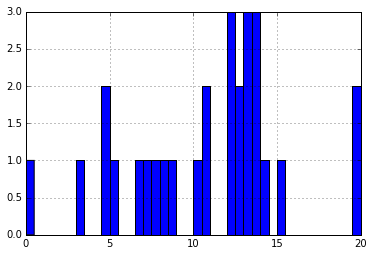

In [25]:
notes_seules = notes[ds_name]
notes_seules.hist(bins = (notes_seules.max() - notes_seules.min())*2)

In [26]:
notes_questions = notes[sous_exo]
notes_analysis = notes_questions.describe()

In [27]:
# J'aimerai récupérer le nom des questions qui ont été le moins répondus
notes_analysis[:1][notes_analysis[:1] == 25]

1   2  1 (Division)  2.a (Division)  2.b (PGCD)  1 (Vrai Faux)  \
count NaN NaN           NaN             NaN         NaN            NaN   

       2 (Proba)  3 (Proba)  1 (Modélisation)  1 (Explication)  \
count         25        NaN               NaN              NaN   

       2 (Vérification) – bonus !  
count                         NaN